## project-1 : House price Predection

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("realtor-data.zip.csv")
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [5]:
df.shape


(2226382, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [7]:
df.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,2.221849e+06,2.224841e+06,1.745065e+06,1.714611e+06,1.900793e+06,2.215516e+06,2.226083e+06,1.657898e+06
mean,5.293989e+04,5.241955e+05,3.275841e+00,2.496440e+00,1.522303e+01,1.012325e+06,5.218668e+04,2.714471e+03
std,3.064275e+04,2.138893e+06,1.567274e+00,1.652573e+00,7.628238e+02,5.837635e+05,2.895408e+04,8.081635e+05
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,2.386100e+04,1.650000e+05,3.000000e+00,2.000000e+00,1.500000e-01,5.063128e+05,2.961700e+04,1.300000e+03
50%,5.288400e+04,3.250000e+05,3.000000e+00,2.000000e+00,2.600000e-01,1.012766e+06,4.838200e+04,1.760000e+03
75%,7.918300e+04,5.500000e+05,4.000000e+00,3.000000e+00,9.800000e-01,1.521173e+06,7.807000e+04,2.413000e+03
max,1.101420e+05,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,2.001357e+06,9.999900e+04,1.040400e+09


In [10]:
df['price'].describe()
#df['house_size'].describe()

count    2.224841e+06
mean     5.241955e+05
std      2.138893e+06
min      0.000000e+00
25%      1.650000e+05
50%      3.250000e+05
75%      5.500000e+05
max      2.147484e+09
Name: price, dtype: float64

In [11]:
df['price'].mean()

np.float64(524195.5192906774)

In [12]:
x = df['house_size']
y = df['price']

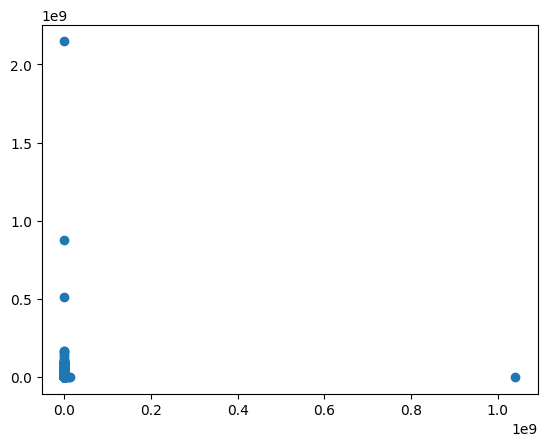

In [15]:
plt.scatter(x,y)
plt.show()

In [18]:
df['price'].isnull().sum()

np.int64(1541)

In [19]:
df = df.dropna(subset=['price'])

In [20]:
df['price'].shape

(2224841,)

In [23]:
df['house_size'] = df['house_size'].fillna(df['house_size'].median(),inplace = True)

In [24]:
df['house_size'].shape

(2224841,)

In [29]:
df=df.drop(columns=['prev_sold_date','street','city','state','zip_code','brokered_by','bed','bath','acre_lot'])

KeyError: "['prev_sold_date', 'street', 'city', 'state', 'zip_code', 'brokered_by'] not found in axis"

In [27]:
df.isnull().sum()

status              0
price               0
bed            480861
bath           510992
acre_lot       325140
house_size    2224841
dtype: int64

In [30]:
df = df.drop(columns=['bed','bath','acre_lot'])

In [31]:
df.isnull().sum()

status              0
price               0
house_size    2224841
dtype: int64

In [32]:
df['house_size'].head(10)

0    None
1    None
2    None
3    None
4    None
5    None
6    None
7    None
8    None
9    None
Name: house_size, dtype: object

In [33]:
df.dtypes


status         object
price         float64
house_size     object
dtype: object

In [35]:
df= df.dropna(subset=['price'])

In [36]:
df['house_size'] = df['house_size'].fillna(df['house_size'].median())

In [37]:
df.isnull().sum()

brokered_by         4533
status                 0
price                  0
bed               480861
bath              510992
acre_lot          325140
street             10864
city                1404
state                  8
zip_code             298
house_size             0
prev_sold_date    733256
dtype: int64

In [38]:
df=df.drop(columns=['prev_sold_date','street','city','state','zip_code','brokered_by','bed','bath','acre_lot','bed','bath','acre_lot'])

In [39]:
df.head()

,status,price,house_size
0,for_sale,105000.0,920.0
1,for_sale,80000.0,1527.0
2,for_sale,67000.0,748.0
3,for_sale,145000.0,1800.0
4,for_sale,65000.0,1760.0


In [40]:
df=df.drop(columns=['status'])

In [41]:
df.head()

,price,house_size
0,105000.0,920.0
1,80000.0,1527.0
2,67000.0,748.0
3,145000.0,1800.0
4,65000.0,1760.0


In [42]:
df.isnull().sum()

price         0
house_size    0
dtype: int64

In [43]:
df.shape

(2224841, 2)

In [46]:
df.dtypes

price         float64
house_size    float64
dtype: object

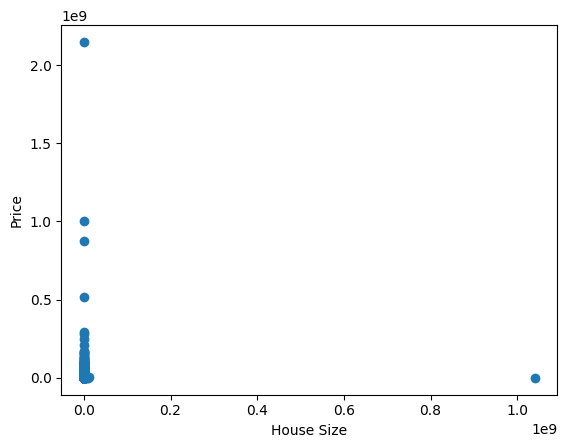

In [49]:
plt.scatter(df['house_size'],df['price'])
plt.xlabel("House Size")
plt.ylabel("Price")
plt.show()

In [51]:
df = df[(df['house_size']<10000) & (df['price'] < 1e7)]

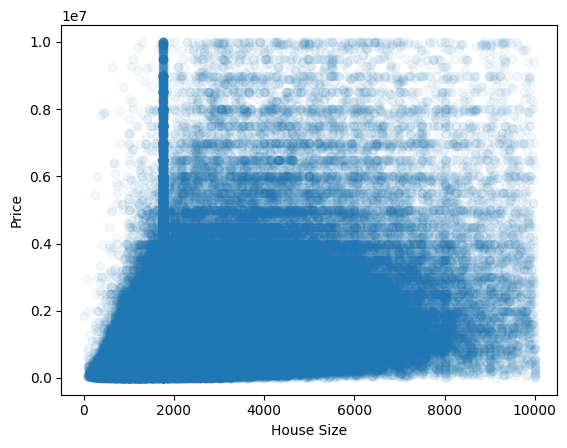

In [53]:
plt.scatter(df['house_size'],df['price'],alpha=0.05)
plt.xlabel("House Size")
plt.ylabel("Price")
plt.show()

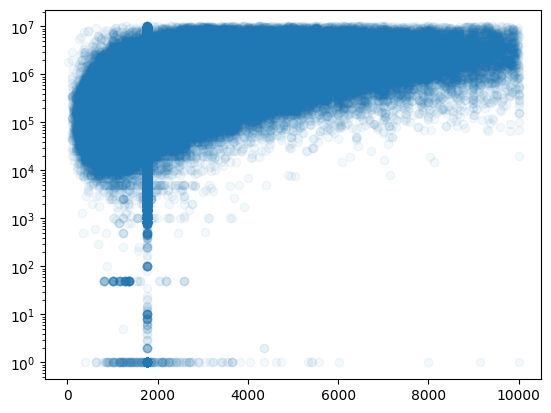

In [54]:
plt.scatter(df['house_size'],df['price'],alpha=0.05)
plt.yscale('log')
plt.show()

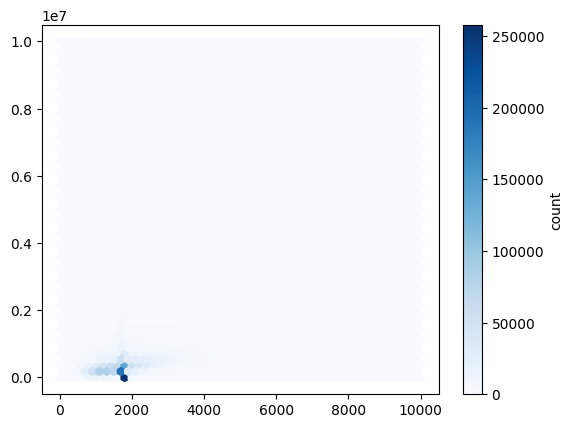

In [55]:
plt.hexbin(df['house_size'],df['price'],gridsize =50,cmap = 'Blues')
plt.colorbar(label="count")
plt.show()

In [56]:
from sklearn.linear_model import LinearRegression
x = df[['house_size']]
y = df['price']
model = LinearRegression()
model.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


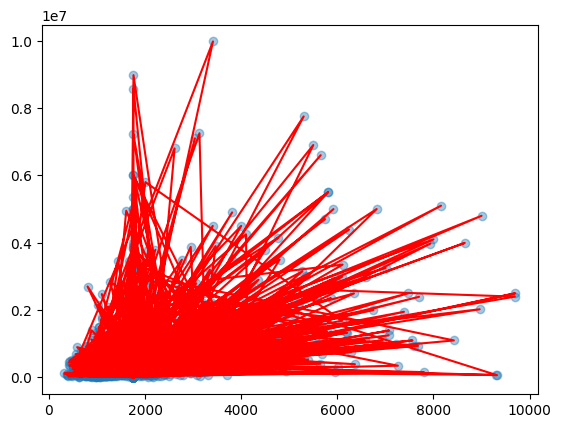

In [57]:
df_s = df.sample(5000)
x_s = df_s[['house_size']]
y_s = df_s['price']
y_pred = model.predict(x_s)
plt.scatter(x_s,y_s,alpha=0.4)
plt.plot(x_s,y_s,color='red')
plt.show()

In [59]:
y_pred

array([495525.99113153, 534810.40167965, 311989.22505068, ...,
       283075.89888726, 427642.52970436, 804772.87096637], shape=(5000,))

In [61]:
model.coef_
model.intercept_


np.float64(-125481.97081324569)

In [62]:
model.predict([[2500]])

C:\Users\user\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([660206.24014927])

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


In [67]:
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [68]:
y_pred = model.predict(X_test)


In [70]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

print("R2:", r2)


R2: 0.18186225663273414


In [71]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("RMSE:", rmse)


RMSE: 607160.1696103141


In [72]:
df['price'].mean()

np.float64(482480.95676560927)

In [5]:
df['bed'] = df['bed'].fillna(df['bed'].median())
df['bath'] = df['bath'].fillna(df['bath'].median())

X = df[['house_size', 'bed', 'bath']]
y = df['price']


In [6]:
y = np.log(df['price'])


C:\Users\user\AppData\Roaming\Python\Python314\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
df = df[df['price']>0]

In [10]:
y= np.log(df['price'])

In [11]:
x= df[['house_size','bed','bath']]

In [13]:
print(x.shape)
print(y.shape)


(2224561, 3)
(2224561,)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [17]:
x.isnull().sum()

house_size    567868
bed                0
bath               0
dtype: int64

In [18]:
df['house_size'] = df['house_size'].fillna(
    df['house_size'].median()
)


In [19]:
x = df[['house_size', 'bed', 'bath']]
y = np.log(df['price'])


In [20]:
x.isnull().sum()


house_size    0
bed           0
bath          0
dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
from sklearn.metrics import r2_score


In [24]:
r2 = r2_score(y_test, y_pred)
print("R2:", r2)


R2: 0.12748961308217044


In [25]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R2:", r2)
print("RMSE:", rmse)


R2: 0.12748961308217044
RMSE: 1.0851952782532277


In [26]:
df = df[['price', 'house_size', 'bed', 'bath', 'city']]


In [27]:
df = df[df['price'] > 0]


In [28]:
df['house_size'] = df['house_size'].fillna(df['house_size'].median())
df['bed'] = df['bed'].fillna(df['bed'].median())
df['bath'] = df['bath'].fillna(df['bath'].median())


In [29]:
df['city'] = df['city'].fillna('Unknown')


In [30]:
df = pd.get_dummies(df, columns=['city'], drop_first=True)


MemoryError: Unable to allocate 41.6 GiB for an array with shape (20089, 2224561) and data type bool

### Lesson : 
- One-hot encoding does NOT scale
- Especially with high-cardinality features (like city)

In [31]:
top_cities = df['city'].value_counts().nlargest(50).index

df['city'] = df['city'].where(df['city'].isin(top_cities), 'Other')


In [32]:
df = pd.get_dummies(df, columns=['city'], drop_first=True)


In [33]:
X = df.drop('price', axis=1)
y = np.log(df['price'])


In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R2:", r2)
print("RMSE:", rmse)

R2: 0.1896292791818489
RMSE: 1.0458381097345593


In [36]:
df['price'].mean()


np.float64(524261.49848630355)


------------------------------------
| Metric            | Verdict      |
| ----------------- | ------------ |
| R² ≈ 0.19         | Weak         |
| RMSE (log) ≈ 1.04 | High         |
| Data quality      | Noisy        |
| Features          | Limited      |
| my learning     | 🔥 Excellent |
------------------------------------

### Conclusion :
Using linear regression with basic numerical and categorical features, my model achieved an R² of ~0.19. The limited performance indicates that house pricing is highly nonlinear and strongly location-dependent, suggesting tree-based models would be more appropriate.


# 📘 Learnings & Mistakes from Housing Price Prediction Project

---

## ❌ Mistake 1: Misunderstanding scientific notation
- Saw values like `1.86e+06` and thought dataset was wrong
- Learned that `1.86e+06 = 1,860,000`
- Scientific notation is only a display format in pandas

---

## ❌ Mistake 2: Expecting data to look linear
- Expected scatter plot to be a straight line
- Real-world data is noisy and contains outliers
- Linear regression finds the best-fit line, not clean-looking data

---

## ❌ Mistake 3: Incorrect use of `inplace=True`
```python
df['house_size'] = df['house_size'].fillna(..., inplace=True)

- inplace=True returns None

- Column got overwritten with NaN

- Never assign pandas operations that use inplace=True

---

## ❌ Mistake 4: Ignoring Jupyter notebook execution order

- Ran cells out of order

- Old dataframe stayed in memory

- Created impossible-looking bugs

Learning: Reload dataset when results don’t make sense

---

## ❌ Mistake 5: Training model with null values

- Sklearn does not allow NaN values

- Even one null crashes model training

Learning:

X.isnull().sum()


- must be zero before training

---

## ❌ Mistake 6: Inconsistent number of samples

- Filtered dataframe rows

- Reused old X and y

- Caused shape mismatch error

Learning: Always recreate X and y after filtering

---

## ❌ Mistake 7: Applying log transform without checking zeros
np.log(price)


- log(0) produces NaN

- Model training failed

Learning: Always ensure price > 0 before applying log transform

---

## ❌ Mistake 8: Thinking regression has accuracy percentage

- Looked for accuracy score

- Regression does not have accuracy

Learning:

Classification → Accuracy

Regression → R² and RMSE

---

## ❌ Mistake 9: Misinterpreting RMSE after log transformation

- RMSE was calculated on log(price)

- Compared directly with actual price values

Learning:

- Log RMSE represents multiplicative error

- Must be interpreted using exponential scale

---

## ❌ Mistake 10: One-hot encoding high-cardinality feature

- City had 20,000+ unique values

- One-hot encoding required 40+ GB RAM

- Notebook crashed

Learning:

- One-hot encoding does not scale

- Use top categories and group others as "Other"

---

## ❌ Mistake 11: Expecting high R² without strong location data

- Used house size, bed, bath, and limited city info

- Missing locality or zip-level features

Learning:

- Housing price is strongly location-dependent

- Low R² often means missing features, not bad model

🔑 Final Learnings

- Algorithms do not improve models — features do

- Data quality limits model performance

- Models cannot learn information that does not exist in data

- Debugging data issues teaches more than tuning models

“A machine learning model can only learn what the data provides.”
